# Dependências

In [47]:
# sdk do rekognition
!pip install boto3
!pip install matplotlib
!pip install pillow

# Inicializações

## Imports

In [48]:
import boto3
from google.colab import files
from PIL import Image, ImageDraw
import io
import matplotlib.pyplot as plt

## Variáveis

In [49]:
aws_access_key_id = ''
aws_secret_access_key = ''

rekognition_client = boto3.client('rekognition',
                                  aws_access_key_id=aws_access_key_id,
                                  aws_secret_access_key=aws_secret_access_key,
                                  region_name='us-east-1')

# Processamento

## Upload do documento

In [50]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving rg-nicolas.jpg to rg-nicolas.jpg


## Processamento do Arquivo[texto do link](https://)

### Labels

In [51]:
with open(image_path, 'rb') as image_file:
    image_bytes = image_file.read()

labels_response = rekognition_client.detect_labels(Image={'Bytes': image_bytes}, MaxLabels=10, MinConfidence=50)

for label in labels_response['Labels']:
  print(f"Label: {label['Name']}, Confiança: {label['Confidence']:.2f}%")

Label: Text, Confiança: 98.34%
Label: Document, Confiança: 77.21%
Label: Driving License, Confiança: 77.21%
Label: Id Cards, Confiança: 77.21%
Label: Money, Confiança: 75.57%
Label: Passport, Confiança: 57.06%
Label: Dollar, Confiança: 52.35%
Label: Person, Confiança: 51.58%
Label: Photography, Confiança: 51.58%
Label: Portrait, Confiança: 51.58%


### Text

In [52]:
text_response = rekognition_client.detect_text(Image={'Bytes': image_bytes})

for item in text_response['TextDetections']:
    # filtar por confiança >= threshold?
    if item['Confidence'] >= 99:
      print(f"Texto: {item['DetectedText']}, Confiança: {item['Confidence']:.2f}%")



Texto: ESTADO DE SÃO PAULO, Confiança: 99.38%
Texto: CPF, Confiança: 99.45%
Texto: CARTEIRA DE IDENTIDADE, Confiança: 99.05%
Texto: DO, Confiança: 99.51%
Texto: BRASIL, Confiança: 99.95%
Texto: DE, Confiança: 99.67%
Texto: SÃO, Confiança: 99.75%
Texto: PAULO, Confiança: 99.28%
Texto: via, Confiança: 99.00%
Texto: DA, Confiança: 99.46%
Texto: GUMBLETON, Confiança: 99.20%
Texto: NÃO, Confiança: 99.60%
Texto: FARIA, Confiança: 99.00%
Texto: DIREITO, Confiança: 99.17%
Texto: BORG, Confiança: 99.08%
Texto: DE, Confiança: 99.01%
Texto: BARUERI, Confiança: 99.87%
Texto: CPF, Confiança: 99.45%
Texto: Delegado, Confiança: 99.45%
Texto: DO, Confiança: 99.62%
Texto: LEI, Confiança: 99.02%
Texto: DE, Confiança: 99.79%
Texto: CARTEIRA, Confiança: 99.62%
Texto: DE, Confiança: 99.53%


### Faces

In [53]:
faces_response = rekognition_client.detect_faces(
    Image={'Bytes': image_bytes},
    Attributes=['ALL']  # Para retornar todos os atributos faciais
)

for face_detail in faces_response['FaceDetails']:
    if face_detail['Confidence'] >= 70:
        print(f"Confiança: {face_detail['Confidence']:.2f}%")
        print(f"Idade estimada: {face_detail['AgeRange']['Low']} - {face_detail['AgeRange']['High']}")
        print(f"Emoções: {[emotion['Type'] for emotion in face_detail['Emotions']]}")
        print(f"Pose: {face_detail['Pose']}")
        print(f"Gênero: {face_detail['Gender']['Value']}")
        print("---")

# Ordenando as emoções pela confiança
emotions = sorted(face_detail['Emotions'], key=lambda x: x['Confidence'], reverse=True)

# Exibindo a emoção com maior confiança
most_confident_emotion = emotions[0]
print(f"Emoção predominante: {most_confident_emotion['Type']}, Confiança: {most_confident_emotion['Confidence']:.2f}%")


Confiança: 99.99%
Idade estimada: 6 - 12
Emoções: ['CALM', 'HAPPY', 'SURPRISED', 'CONFUSED', 'ANGRY', 'DISGUSTED', 'FEAR', 'SAD']
Pose: {'Roll': 1.4720793962478638, 'Yaw': 0.1697455495595932, 'Pitch': 19.439579010009766}
Gênero: Male
---
Emoção predominante: CALM, Confiança: 35.08%


## Upload da Selfie

In [54]:
uploaded_selfie = files.upload()
selfie_path = list(uploaded_selfie.keys())[0]

Saving selfie-nicolas.jpg to selfie-nicolas.jpg


### Face

In [55]:
with open(selfie_path, 'rb') as image_file:
    selfie_image_bytes = image_file.read()

selfie_faces_response = rekognition_client.detect_faces(
    Image={'Bytes': selfie_image_bytes},
    Attributes=['ALL']  # Para retornar todos os atributos faciais
)

for face_detail in selfie_faces_response['FaceDetails']:
    if face_detail['Confidence'] >= 70:
        print(f"Confiança: {face_detail['Confidence']:.2f}%")
        print(f"Idade estimada: {face_detail['AgeRange']['Low']} - {face_detail['AgeRange']['High']}")
        print(f"Emoções: {[emotion['Type'] for emotion in face_detail['Emotions']]}")
        print(f"Pose: {face_detail['Pose']}")
        print(f"Gênero: {face_detail['Gender']['Value']}")
        print("---")

# Ordenando as emoções pela confiança
emotions = sorted(face_detail['Emotions'], key=lambda x: x['Confidence'], reverse=True)

# Exibindo a emoção com maior confiança
most_confident_emotion = emotions[0]
print(f"Emoção predominante: {most_confident_emotion['Type']}, Confiança: {most_confident_emotion['Confidence']:.2f}%")

Confiança: 100.00%
Idade estimada: 8 - 14
Emoções: ['HAPPY', 'SURPRISED', 'CALM', 'CONFUSED', 'DISGUSTED', 'FEAR', 'ANGRY', 'SAD']
Pose: {'Roll': -3.7607879638671875, 'Yaw': -13.357120513916016, 'Pitch': 7.21509313583374}
Gênero: Male
---
Emoção predominante: HAPPY, Confiança: 100.00%


### Verificar identidade

In [56]:
response_comparacao = rekognition_client.compare_faces(
    SourceImage={'Bytes': image_bytes},
    TargetImage={'Bytes': selfie_image_bytes},
    SimilarityThreshold=80
)

if len(response_comparacao['FaceMatches']) > 0:
    for match in response_comparacao['FaceMatches']:
        print(f"Rosto encontrado com similaridade de {match['Similarity']:.2f}%")
else:
    print("Nenhuma correspondência de rosto encontrada.")

Rosto encontrado com similaridade de 97.49%


## Estou na foto?

In [57]:
uploaded_crowd = files.upload()
crowd_path = list(uploaded_crowd.keys())[0]

Saving crowd.jpg to crowd (2).jpg


### Faces

Total de faces encontradas: 8
Nenhuma correspondência de face encontrada para esta face.
Face encontrada com similaridade de 98.32%
Nenhuma correspondência de face encontrada para esta face.
Erro nos parâmetros: An error occurred (InvalidParameterException) when calling the CompareFaces operation: Request has invalid parameters
Nenhuma correspondência de face encontrada para esta face.
Nenhuma correspondência de face encontrada para esta face.
Nenhuma correspondência de face encontrada para esta face.
Nenhuma correspondência de face encontrada para esta face.
Vou mostrar a imagem


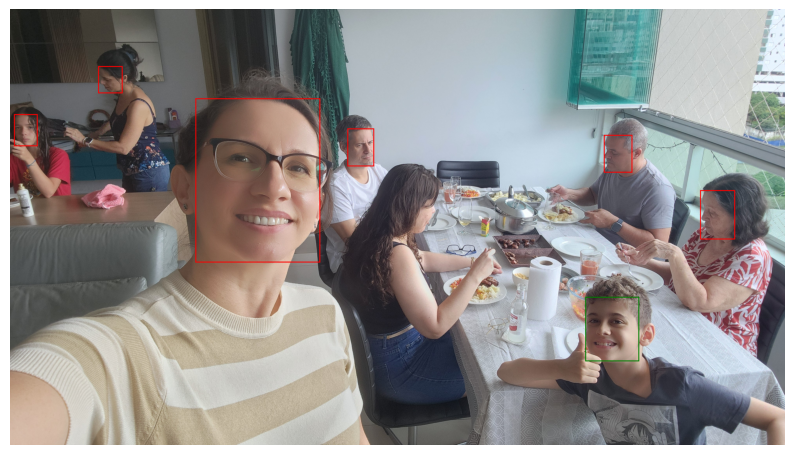

In [59]:
from PIL import Image
import io

# Carregar a imagem de referência (face de referência)
# with open(reference_image_path, 'rb') as reference_file:
#     image_bytes = reference_file.read()

# Carregar a imagem com a multidão
with open(crowd_path, 'rb') as image_file:
    crowd_image_bytes = image_file.read()
    crowd_image = Image.open(io.BytesIO(crowd_image_bytes))

# Detectar faces na imagem da multidão
crowd_faces_response = rekognition_client.detect_faces(
    Image={'Bytes': crowd_image_bytes},
    Attributes=['ALL']  # Para retornar todos os atributos faciais
)

# Contar a quantidade de faces detectadas
quantidade_faces = len(crowd_faces_response['FaceDetails'])
print(f"Total de faces encontradas: {quantidade_faces}")

draw = ImageDraw.Draw(crowd_image)
for face_detail in crowd_faces_response['FaceDetails']:
    bounding_box = face_detail['BoundingBox']

    # Calcular as coordenadas de recorte
    width, height = crowd_image.size
    left = int(bounding_box['Left'] * width)
    top = int(bounding_box['Top'] * height)
    right = int((bounding_box['Left'] + bounding_box['Width']) * width)
    bottom = int((bounding_box['Top'] + bounding_box['Height']) * height)

    # Recortar a face da imagem
    face_image = crowd_image.crop((left, top, right, bottom))

    # Converter a face recortada para bytes
    with io.BytesIO() as byte_io:
        face_image.save(byte_io, format='JPEG')  # Certificar que a face é salva como JPEG
        face_bytes = byte_io.getvalue()

    try:
      # Comparar a face detectada com a face de referência
      response_crowd = rekognition_client.compare_faces(
          SourceImage={'Bytes': image_bytes},  # Imagem de referência
          TargetImage={'Bytes': face_bytes},  # Imagem com a face recortada
          SimilarityThreshold=80  # Defina um valor de similaridade mínimo
      )

      # Verificar se encontramos uma correspondência
      if len(response_crowd['FaceMatches']) > 0:
          for match in response_crowd['FaceMatches']:
              draw.rectangle([left, top, right, bottom], outline="green", width=5)
              print(f"Face encontrada com similaridade de {match['Similarity']:.2f}%")
      else:
          draw.rectangle([left, top, right, bottom], outline="red", width=5)
          print("Nenhuma correspondência de face encontrada para esta face.")
    except rekognition_client.exceptions.InvalidParameterException as e:
      print(f"Erro nos parâmetros: {e}")
    except Exception as e:
      print(f"Erro desconhecido: {e}")

print(f"Vou mostrar a imagem")
# Exibir a imagem no Google Colab com matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(crowd_image)
plt.axis('off')  # Desativa os eixos
plt.show()